# Genetic Algorithm - randomly generated portfolios

### seed collection

Seed values ensure that random number generation is reproducible and, to some extent, controlled. By setting a seed, the sequence of "random" numbers remains the same each time you run the code, which is useful for debugging, testing, and experimentation. While randomness still exists, setting the seed allows you to replay or share specific scenarios. To make it memorable, use your favorite numbers as seeds.

For fun, I collected some cool numbers for your entertainment — enjoy exploring the randomness!


- 1337 — Leet (elite) speak, popular in hacker culture.
- 007 — James Bond
- 008 - and his colleague
- 37 - the most frequently selected "random" number by humans
- 1701 — The registry number of the USS Enterprise from Star Trek.
- 1138 - George Lucas' directorial debut, appears in StarWars
- 101 -  Matrix, Neos appartman number.
- 6EQUJ5 - wow! signal - use it as hash(6EQUJ5)
- 88 - the speed required to go Back to the Future.
- 2187 - The number of Princess Leia's detention cell on Death Star.
- 1984 — A nod to George Orwell’s famous dystopian novel.
- 808 — Famous Roland TR-808 drum machine, iconic in electronic music.
- 42 — The original Hitchhiker’s Guide to the Galaxy number.
- 314 — A reference to Pi (3.14), cool for math enthusiasts.
- 1618 — The first few digits of the golden ratio (1.618033...).
- 12345 — the secret password from Spaceballs.
- 1967 - my year of birth
- 536 - the year of Late Antique Little Ice Age in Europe
- 1986 - Chernobyl Disaster
- 12 - twelve monkey, dirty dozen, blues
- 66 - order ended the Jedis in Star Wars
- 426 - LV-426 Acheron the moon Xenomorph is first encountered by humans
- 51 - Area 51 the popular landing site of UFOs
- 52 - Area 52 the ugly neighborhood (Dugway Proving Ground military testing facility).
- 0077 — Agent "Double-O Seven" but with extra flair.
- 404 — Annoying "not found" error code, you don't find it, debugging vibes.
- 1331 — A palindrome number, satisfying for symmetry lovers.
- 777 — Jackpot! For a bit of luck from the slot machines.
- 24601 — Jean Valjean's prisoner number in Les Misérables.
- 9000 — "I'm sorry, Dave. I'm afraid I can't do that." — HAL 9000 from 2001: A Space Odyssey.
- 8675309 — Jenny's number from the famous 1980s song "867-5309/Jenny."
- 1492 — The year Columbus sailed the ocean blue, a nod to historical events.
- 221 — Sherlock Holmes' iconic address at 221B Baker Street.
- 451 — Fahrenheit 451 by Ray Bradbury, representing censorship and dystopia.
- 1776 — The year of the U.S. Declaration of Independence.
- 1985 — The year Marty McFly travels back to in Back to the Future.
- 2015 - The future of Marty McFly back in the Future.
- 300 — The brave Spartans of 300, a movie reference.
- 1999 — Party like it’s 1999! A nod to Prince’s iconic song.


### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import random
import math
from itertools import combinations

In [2]:
plt.style.use('ggplot')

In [3]:
seed = 51 #Area 51 the popular landing site of UFOs
np.random.seed (seed)

In [4]:
url = 'https://datahub.io/core/s-and-p-500-companies/r/constituents.csv'
sp500_tickers = pd.read_csv(url)

# Get the list of tickers, randomly by using sample
num_of_symbols = 100
tickers = sp500_tickers['Symbol'].sample(num_of_symbols, random_state=seed).tolist() # randome_state is the seed for the random choice

In [5]:
#Yahoo! connector to download the prices
stocks = tickers
start_date = '2020-01-01'
end_date = dt.datetime.today().strftime('%Y-%m-%d') # until today
data = yf.download(stocks, start=start_date, end=end_date)

[*********************100%***********************]  100 of 100 completed


In [6]:
data = data.reindex(columns=pd.MultiIndex.from_product([data.columns.levels[0], tickers])) # reorder the columns
data.head()

Price                       Adj Close                                        \
                                   CI         PEP        PSX      CMCSA CEG   
Date                                                                          
2020-01-02 00:00:00+00:00  192.106415  118.635864  91.679031  40.050060 NaN   
2020-01-03 00:00:00+00:00  190.456589  118.469925  88.647583  39.732288 NaN   
2020-01-06 00:00:00+00:00  193.962433  118.924103  88.091942  39.432144 NaN   
2020-01-07 00:00:00+00:00  194.909164  117.054848  88.361603  39.849003 NaN   
2020-01-08 00:00:00+00:00  198.171234  117.657562  85.060493  40.256977 NaN   

Price                                                                    \
                                 WYNN         PNC       STLD         SO   
Date                                                                      
2020-01-02 00:00:00+00:00  140.138123  133.292114  30.734804  51.756001   
2020-01-03 00:00:00+00:00  138.059464  132.012131  30.189217  51.706413   
2020-01-06 00:00:00+00:00  137.786194  131.746170  30.098282  51.913040   
2020-01-07 00:00:00+00:00  138.440048  130.707184  30.762087  51.756001   
2020-01-08 00:00:00+00:00  139.308594  132.061996  30.789360  51.739479   

Price                                  ...    Volume                    \
                                 MKTX  ...       KMI      BAX     ROST   
Date                                   ...                               
2020-01-02 00:00:00+00:00  364.906647  ...  10373100  2957800  1722500   
2020-01-03 00:00:00+00:00  364.714630  ...  10148700  1871700  1486500   
2020-01-06 00:00:00+00:00  358.985504  ...  13978300  3500000  1573600   
2020-01-07 00:00:00+00:00  360.108337  ...  14736900  4803200  1961900   
2020-01-08 00:00:00+00:00  349.600220  ...  10651500  3576600  1565200   

Price                                                                          \
                             ORLY     MTB     GRMN      APD     WELL        A   
Date                                                                            
2020-01-02 00:00:00+00:00  796100  509100   828000  1320500  2049100  1410500   
2020-01-03 00:00:00+00:00  482900  461900   503800  1710400  1687000  1118300   
2020-01-06 00:00:00+00:00  837100  372900   686200  1737400  2201200  1993200   
2020-01-07 00:00:00+00:00  661500  324800   781200  1518900  1239500  1684700   
2020-01-08 00:00:00+00:00  479500  462500  1080000   965700  2016800  1847600   

Price                              
                              DPZ  
Date                               
2020-01-02 00:00:00+00:00  500000  
2020-01-03 00:00:00+00:00  490800  
2020-01-06 00:00:00+00:00  525400  
2020-01-07 00:00:00+00:00  501000  
2020-01-08 00:00:00+00:00  543000  

[5 rows x 600 columns]

In [7]:
stock_close = data['Adj Close']
stock_close.head()

,CI,PEP,PSX,CMCSA,CEG,WYNN,PNC,STLD,SO,MKTX,...,KMI,BAX,ROST,ORLY,MTB,GRMN,APD,WELL,A,DPZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,192.106415,118.635864,91.679031,40.050060,NaN,140.138123,133.292114,30.734804,51.756001,364.906647,...,15.312112,78.079262,111.635002,437.519989,145.778412,87.693764,206.406906,68.426231,83.214867,278.352142
2020-01-03 00:00:00+00:00,190.456589,118.469925,88.647583,39.732288,NaN,138.059464,132.012131,30.189217,51.706413,364.714630,...,15.428554,77.742813,111.663651,438.750000,144.287140,87.131966,201.816895,69.630142,81.878784,279.557007
2020-01-06 00:00:00+00:00,193.962433,118.924103,88.091942,39.432144,NaN,137.786194,131.746170,30.098282,51.913040,358.985504,...,15.486774,77.551857,112.208305,434.660004,143.094131,87.114136,201.727585,70.688873,82.120834,278.873901
2020-01-07 00:00:00+00:00,194.909164,117.054848,88.361603,39.849003,NaN,138.440048,130.707184,30.762087,51.756001,360.108337,...,15.523161,77.733727,113.517387,428.769989,141.364258,86.980362,202.584854,70.227814,82.372543,276.881561
2020-01-08 00:00:00+00:00,198.171234,117.657562,85.060493,40.256977,NaN,139.308594,132.061996,30.789360,51.739479,349.600220,...,15.399443,78.861237,113.851822,431.899994,142.080078,86.498833,203.683258,70.244888,83.185814,275.657837


### individual stock analysis

In [8]:
def stock_KPIs(dataframe, start_date, end_date):
  '''
    Explanation
    Daily Returns Calculation: The calculate_individual_returns function calculates returns per stock, leaving NaN where data is missing, so no artificial data is introduced.
    Mean Returns Calculation: Using mean(skipna=True) calculates the mean for each stock based only on existing data, ignoring NaN values.
    Covariance Matrix Calculation: The covariance matrix is calculated using pairwise deletion (min_periods=1), so each covariance value is based only on dates where both stocks have available data.
    '''
  filtered_df = dataframe.loc[start_date:end_date] # option to slice the data frame by date
  filtered_df = filtered_df.where(filtered_df > 0) # Replace zero or negative values with NaN (to handle cases where data might be invalid)
  filtered_df = filtered_df.ffill()  # Forward-fill only for zero or negative values that are transformed to NaN, Note: This still keeps original missing values as NaN
  def calculate_individual_returns(df):
        # Calculate daily log returns without filling NaNs (preserves missing data)
        return df.apply(lambda x: np.log(x / x.shift(1)))

  p_daily_returns = calculate_individual_returns(filtered_df) # still keeps the non-trading periods

  mean_returns = p_daily_returns.mean(skipna=True) * 252  # Annualized mean returns ignoring NaNs
  variance = p_daily_returns.var(skipna=True) * 252 # Annualized variance ignoring NaNs
  volatility = p_daily_returns.std(skipna=True) * np.sqrt(252)  # Annualized standard deviation
  cov_matrix_pairwise = p_daily_returns.cov(min_periods=1) * 252  # Annualized pairwise covariance matrix

  return {
      'data frame' : filtered_df,
      'variance': variance,
      'volatility': volatility,
      'mean_returns': mean_returns, # series for mean returns
      'cov_matrix': cov_matrix_pairwise
  }

In [9]:
# to check - analysis shall use annualized figures
mean_returns = stock_KPIs(stock_close, start_date, end_date)['mean_returns'].rename('returns')
cov_matrix = stock_KPIs(stock_close, start_date, end_date)['cov_matrix']

In [10]:
cov_matrix

,CI,PEP,PSX,CMCSA,CEG,WYNN,PNC,STLD,SO,MKTX,...,KMI,BAX,ROST,ORLY,MTB,GRMN,APD,WELL,A,DPZ
CI,0.113804,0.035401,0.061060,0.037781,0.017466,0.066401,0.057550,0.062733,0.038561,0.029364,...,0.050998,0.034915,0.056730,0.041011,0.059201,0.037624,0.044488,0.056940,0.038116,0.016371
PEP,0.035401,0.049417,0.025210,0.031983,0.005745,0.028950,0.033835,0.028653,0.038825,0.029227,...,0.025210,0.028727,0.031299,0.035347,0.031129,0.029263,0.034449,0.036289,0.028388,0.019502
PSX,0.061060,0.025210,0.186155,0.045848,0.026187,0.117393,0.091527,0.099704,0.037578,0.018890,...,0.098458,0.028401,0.070685,0.036894,0.098036,0.043207,0.045854,0.086414,0.037333,0.010719
CMCSA,0.037781,0.031983,0.045848,0.081127,0.008531,0.062086,0.052745,0.048622,0.032996,0.029002,...,0.037519,0.033996,0.047203,0.034080,0.050638,0.036955,0.035942,0.052220,0.035467,0.021619
CEG,0.017466,0.005745,0.026187,0.008531,0.180215,0.028252,0.024551,0.043375,0.020326,0.012773,...,0.028886,0.008531,0.030346,0.017772,0.019029,0.022692,0.027965,0.019777,0.030350,0.021605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMN,0.037624,0.029263,0.043207,0.036955,0.022692,0.062573,0.054372,0.053957,0.034192,0.041336,...,0.038666,0.028513,0.050277,0.034193,0.053735,0.088999,0.041738,0.048261,0.047658,0.020577
APD,0.044488,0.034449,0.045854,0.035942,0.027965,0.062592,0.055406,0.059090,0.043347,0.035306,...,0.042350,0.035046,0.044655,0.032398,0.052878,0.041738,0.094991,0.051740,0.045927,0.019608
WELL,0.056940,0.036289,0.086414,0.052220,0.019777,0.113662,0.083455,0.083165,0.051630,0.034621,...,0.078296,0.031684,0.081577,0.043814,0.085446,0.048261,0.051740,0.167615,0.040505,0.022062
A,0.038116,0.028388,0.037333,0.035467,0.030350,0.058950,0.051735,0.050685,0.032877,0.044324,...,0.036027,0.040640,0.044320,0.032786,0.048315,0.047658,0.045927,0.040505,0.089150,0.026911


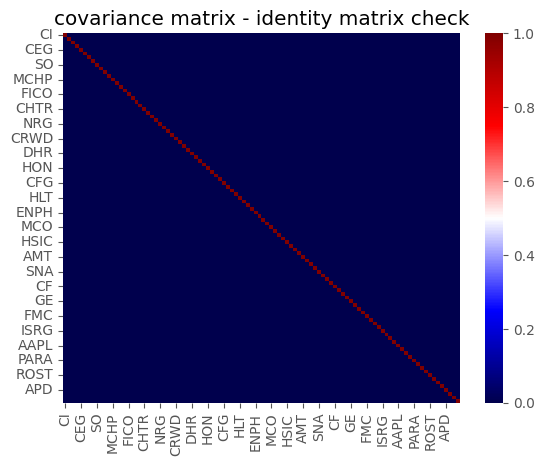

In [11]:
# checking the matrix inverse
inv_matrix = np.linalg.inv(cov_matrix)
np.set_printoptions(suppress=True, precision=6)
identity_matrix = pd.DataFrame(np.dot(cov_matrix, inv_matrix), index=cov_matrix.index, columns=cov_matrix.index).round(0)
sns.heatmap(identity_matrix, annot=False, fmt='0.27', cmap='seismic')
plt.title('covariance matrix - identity matrix check')
plt.show()

In [12]:
metrics = pd.DataFrame({
    'mean_returns': mean_returns,
    'variance': np.diag(cov_matrix),
    'volatility': np.sqrt(np.diag(cov_matrix))
}, index=tickers)
metrics

,mean_returns,variance,volatility
CI,0.103376,0.113804,0.337348
PEP,0.069048,0.049417,0.222298
PSX,0.055759,0.186155,0.431457
CMCSA,0.017395,0.081127,0.284829
CEG,0.662244,0.180215,0.424518
...,...,...,...
GRMN,0.168827,0.088999,0.298328
APD,0.083690,0.094991,0.308206
WELL,0.138035,0.167615,0.409408
A,0.103037,0.089150,0.298580


In [13]:
def chart(x_min=0,
          x_max=metrics['volatility'].max() +0.1,
          y_min= metrics['mean_returns'].min() - 0.1,
          y_max=metrics['mean_returns'].max() + 0.1,
          title='Simulated Portfolio Optimization',
          xlabel='Risk (Sigma)',
          ylabel='Return'):
    """
    Sets up the chart with specified axis limits, labels, and title.
    Returns the figure and axes objects for further plotting.
    """
    fig, ax = plt.subplots(figsize=(15, 6))

    # Set x and y axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Adding labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Hide top and right spines
    ax.spines[['top', 'right']].set_visible(False)

    # Turn off grid
    ax.grid(False)

    return fig, ax

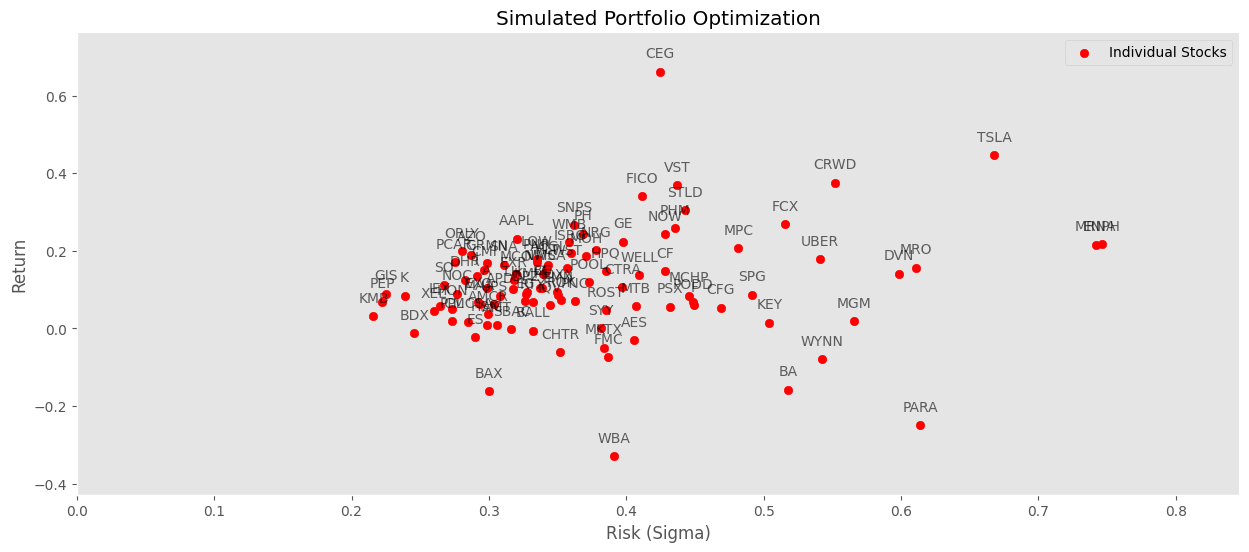

In [15]:
fig, ax = chart() # pre-defined chart

# Individual stocks
ax.scatter(metrics['volatility'], metrics['mean_returns'], color='red', label='Individual Stocks')

for i, ticker in enumerate(metrics.index):
    ax.annotate(
        ticker,
        (metrics['volatility'].iloc[i], metrics['mean_returns'].iloc[i]),
        alpha = 0.6,
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

# Update the legend
ax.legend()

# Redraw the figure to update the display
plt.show()

In [16]:
def portfolio_return(weights, returns):
  weights_array = np.array(weights)
  returns = np.dot(weights_array,returns)
  return returns

In [17]:
def portfolio_volatility(weights, cov_matrix):
  weights_array = np.array(weights)
  variance = np.dot(weights_array.T, np.dot(cov_matrix, weights_array))
  return np.sqrt(variance)

In [18]:
def initial_generation(metrics, num_stocks_per_portfolio, num_portfolios):
    portfolio_data = []

    # Check if we can create portfolios with the given number of stocks
    if num_stocks_per_portfolio > len(metrics):
        return 'Error: num_stocks_per_portfolio is too large'

    for _ in range(num_portfolios):
        # Step 1: Randomly select `num_stocks_per_portfolio` stocks from the `metrics` index
        selected_stocks = random.sample(metrics.index.tolist(), num_stocks_per_portfolio)

        # Step 2: Generate random weights that sum to 1 for the selected stocks
        weights = np.random.dirichlet(np.ones(num_stocks_per_portfolio), size=1)[0]

        # Step 3: Store the selected stocks and weights in a dictionary
        portfolio_data.append({
            'elements': selected_stocks,
            'weights': weights
        })

    # Convert the list of portfolios to a DataFrame
    portfolios = pd.DataFrame(portfolio_data)
    return portfolios


In [19]:

def plot_generation_portfolios(generation_df, metrics, generation_name="generation", x_min=0, x_max=1, y_min=-0.5, y_max=1):
    # Normalize the Sharpe ratio between 0 and 1
    sharpe_min = generation_df['portfolio_sharpe'].min()
    sharpe_max = generation_df['portfolio_sharpe'].max()
    normalized_sharpe = (generation_df['portfolio_sharpe'] - sharpe_min) / (sharpe_max - sharpe_min)

    # Calculate the average Sharpe ratio
    average_sharpe = generation_df['portfolio_sharpe'].mean()
    maximum_sharpe = generation_df['portfolio_sharpe'].max()

    # Create a color map based on the normalized Sharpe ratio
    cmap = plt.colormaps['cividis']  # Choose any colormap
    colors = cmap(normalized_sharpe)

    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(15, 6))

      # Set x and y axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Set the title with the generation name
    ax.set_title(f"{generation_name} simulated portfolios risk and return analysis")

    # Plot each generation's portfolios, coloring them by Sharpe ratio
    scatter = ax.scatter(
        generation_df['portfolio_volatility'],
        generation_df['portfolio_return'],
        c=normalized_sharpe,  # Use normalized Sharpe ratio for color
        cmap='cividis',
        label='Portfolios',
        alpha=0.7,
        edgecolors='w',
        s=60  # Size of points
    )

    # Now plot individual stocks so they appear on top
    ax.scatter(metrics['volatility'], metrics['mean_returns'], color='red', label='Individual Stocks', zorder=5)

    # Annotate the tickers
    for i, ticker in enumerate(metrics.index):
        ax.annotate(
            ticker,
            (metrics['volatility'].iloc[i], metrics['mean_returns'].iloc[i]),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            zorder=10  # Ensure annotations are on top
        )

    # Add a color bar to explain the mapping of color to Sharpe ratio
    cbar = fig.colorbar(scatter)
    cbar.set_label('Sharpe Ratio')

    # Add a text box with the average Sharpe ratio
    textstr = f"average Sharpe ratio is {average_sharpe:.2f}\nmaximum Sharpe ratio is {maximum_sharpe:.2f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax.text(0.6, 0.8, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)

    # Update the legend to show the individual stocks and generation portfolios
    ax.legend()
    plt.tight_layout()

    # Redraw the figure to display the combined chart

# Example usage:
# plot_generation_portfolios(generation_02, metrics, generation_name="generation_02")



In [20]:
num_stocks_per_portfolio = 15
fairies_num = 7 # fairies are the best performers of the generation
wanderers_num = 3 # wanderers are random guys appeared, outsiders
num_portfolios = int((((fairies_num + wanderers_num) * (fairies_num + wanderers_num - 1)) / 2 ) * 4) # each pair have 4 children = total population
df_initial = initial_generation(metrics, num_stocks_per_portfolio, num_portfolios)
df_initial

,elements,weights
0,"[IQV, A, WBA, MPC, GIS, AES, MGM, ES, HPQ, IEX...","[0.1076733950118102, 0.004373410759647629, 0.0..."
1,"[J, KMB, K, STLD, ORLY, FCX, BDX, HPQ, EXC, AM...","[0.0038984766733399737, 0.031162006828932005, ..."
2,"[SPG, MRO, BA, IQV, TSLA, FCX, HSIC, SYY, PARA...","[0.06696638088951676, 0.03367338769358171, 0.1..."
3,"[DVN, BA, RTX, GIS, K, WMB, FMC, CEG, POOL, AZ...","[0.23043652773962922, 0.09498821279237869, 0.0..."
4,"[SBAC, MCHP, CFG, CI, RTX, MGM, ES, UPS, ORLY,...","[0.03430267909911791, 0.05057063858119286, 0.0..."
...,...,...
175,"[IDXX, NOW, CMCSA, NWSA, CRWD, MTB, SNPS, SO, ...","[0.07067649765675262, 0.006871596259060264, 0...."
176,"[FCX, PEP, PSX, F, LH, FICO, UBER, PODD, WYNN,...","[0.10900466497727349, 0.03794233380317418, 0.0..."
177,"[PSX, PNC, SYY, CF, MGM, MCO, KMI, BAX, GIS, A...","[0.026102326111060465, 0.003677019371057909, 0..."
178,"[HPQ, EG, CHTR, LOW, ORLY, AES, HON, ROK, DHR,...","[0.12461390094568756, 0.05883006011826209, 0.0..."


In [21]:
def add_metrics(generation_df, metrics, cov_matrix):
    '''Allows duplicates in the portfolios and attaches relevant metrics.'''

    portfolios_with_metrics = []

    for _, row in generation_df.iterrows():
        elements = row['elements']  # Keep tickers as is (including duplicates)
        weights = np.array(row['weights'])  # Convert weights to NumPy array for matrix operations

        # Retrieve metrics for the selected tickers (including duplicates)
        mean_returns = []
        volatility = []
        for element in elements:
            mean_returns.append(metrics.loc[element, 'mean_returns'])
            volatility.append(metrics.loc[element, 'volatility'])

        # Build the covariance matrix for the selected tickers (including duplicates)
        portfolio_cov_matrix = cov_matrix.loc[elements, elements]

        # Store portfolio with attached metrics
        portfolios_with_metrics.append({
            'elements': elements,
            'weights': weights,
            'mean_returns': np.array(mean_returns),
            'volatility': np.array(volatility),
            'cov_matrix': portfolio_cov_matrix
        })

    # Convert to DataFrame for further use
    portfolios_with_metrics_df = pd.DataFrame(portfolios_with_metrics)
    return portfolios_with_metrics_df



In [22]:
portfolios_with_metrics_df = add_metrics(df_initial, metrics, cov_matrix)
portfolios_with_metrics_df.head()

,elements,weights,mean_returns,volatility,cov_matrix
0,"[IQV, A, WBA, MPC, GIS, AES, MGM, ES, HPQ, IEX...","[0.1076733950118102, 0.004373410759647629, 0.0...","[0.060177421659559735, 0.10303746122955866, -0...","[0.34430182774708046, 0.2985795762658356, 0.39...",IQV A WBA MPC ...
1,"[J, KMB, K, STLD, ORLY, FCX, BDX, HPQ, EXC, AM...","[0.0038984766733399737, 0.031162006828932005, ...","[0.13621918677430098, 0.031972478947716376, 0....","[0.29127715973446816, 0.21598125285488348, 0.2...",J KMB K STLD ...
2,"[SPG, MRO, BA, IQV, TSLA, FCX, HSIC, SYY, PARA...","[0.06696638088951676, 0.03367338769358171, 0.1...","[0.08676316874946598, 0.1565476287859074, -0.1...","[0.4913769144404844, 0.610570010166049, 0.5177...",SPG MRO BA IQV ...
3,"[DVN, BA, RTX, GIS, K, WMB, FMC, CEG, POOL, AZ...","[0.23043652773962922, 0.09498821279237869, 0.0...","[0.14111412913006957, -0.15786640031607863, 0....","[0.5985206989427883, 0.5177256259690577, 0.331...",DVN BA RTX GIS ...
4,"[SBAC, MCHP, CFG, CI, RTX, MGM, ES, UPS, ORLY,...","[0.03430267909911791, 0.05057063858119286, 0.0...","[-0.0011724952317480098, 0.08411733377092324, ...","[0.31632494804698874, 0.445639287059504, 0.468...",SBAC MCHP CFG CI ...


In [23]:
def add_portfolio_metrics(portfolios_with_metrics_df, risk_free_rate=0.05, generation_id=0):
    portfolio_metrics = []

    for i, row in portfolios_with_metrics_df.iterrows():
        row_data = row.to_dict()

        # Extract components
        elements = row_data.get('elements', [])
        weights = row_data.get('weights', [])
        mean_returns_selected = row_data.get('mean_returns', [])
        cov_matrix_selected = row_data.get('cov_matrix', None)

        # Revised check for missing data
        if len(elements) == 0 or len(weights) == 0 or len(mean_returns_selected) == 0 or cov_matrix_selected is None:
            print(f"Warning: Missing data in row {i}, skipping...")
            continue

        # Calculate portfolio metrics if data is complete
        portfolio_return = np.dot(weights, mean_returns_selected)
        portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_selected, weights))
        portfolio_volatility = np.sqrt(portfolio_variance)
        portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility

        # Store the calculated metrics
        portfolio_metrics.append({
            'generation_id': generation_id,
            'portfolio_return': portfolio_return,
            'portfolio_variance': portfolio_variance,
            'portfolio_volatility': portfolio_volatility,
            'portfolio_sharpe': portfolio_sharpe
        })

    # Convert the results into a DataFrame
    portfolio_metrics_df = pd.DataFrame(portfolio_metrics)

    # Merge the original portfolio data with the calculated metrics
    portfolio_df_with_metrics = pd.concat([portfolios_with_metrics_df, portfolio_metrics_df], axis=1)

    return portfolio_df_with_metrics

In [24]:
generation_00 = add_portfolio_metrics(portfolios_with_metrics_df)
generation_00

,elements,weights,mean_returns,volatility,cov_matrix,generation_id,portfolio_return,portfolio_variance,portfolio_volatility,portfolio_sharpe
0,"[IQV, A, WBA, MPC, GIS, AES, MGM, ES, HPQ, IEX...","[0.1076733950118102, 0.004373410759647629, 0.0...","[0.060177421659559735, 0.10303746122955866, -0...","[0.34430182774708046, 0.2985795762658356, 0.39...",IQV A WBA MPC ...,0,0.049362,0.074325,0.272626,-0.002340
1,"[J, KMB, K, STLD, ORLY, FCX, BDX, HPQ, EXC, AM...","[0.0038984766733399737, 0.031162006828932005, ...","[0.13621918677430098, 0.031972478947716376, 0....","[0.29127715973446816, 0.21598125285488348, 0.2...",J KMB K STLD ...,0,0.137749,0.066877,0.258606,0.339315
2,"[SPG, MRO, BA, IQV, TSLA, FCX, HSIC, SYY, PARA...","[0.06696638088951676, 0.03367338769358171, 0.1...","[0.08676316874946598, 0.1565476287859074, -0.1...","[0.4913769144404844, 0.610570010166049, 0.5177...",SPG MRO BA IQV ...,0,0.112476,0.088266,0.297095,0.210289
3,"[DVN, BA, RTX, GIS, K, WMB, FMC, CEG, POOL, AZ...","[0.23043652773962922, 0.09498821279237869, 0.0...","[0.14111412913006957, -0.15786640031607863, 0....","[0.5985206989427883, 0.5177256259690577, 0.331...",DVN BA RTX GIS ...,0,0.191792,0.085372,0.292184,0.485282
4,"[SBAC, MCHP, CFG, CI, RTX, MGM, ES, UPS, ORLY,...","[0.03430267909911791, 0.05057063858119286, 0.0...","[-0.0011724952317480098, 0.08411733377092324, ...","[0.31632494804698874, 0.445639287059504, 0.468...",SBAC MCHP CFG CI ...,0,0.109721,0.078254,0.279738,0.213490
...,...,...,...,...,...,...,...,...,...,...
175,"[IDXX, NOW, CMCSA, NWSA, CRWD, MTB, SNPS, SO, ...","[0.07067649765675262, 0.006871596259060264, 0....","[0.0939983197647912, 0.24337636251853065, 0.01...","[0.34987084939771906, 0.42792659184062826, 0.2...",IDXX NOW CMCSA NWSA ...,0,0.124720,0.057705,0.240219,0.311049
176,"[FCX, PEP, PSX, F, LH, FICO, UBER, PODD, WYNN,...","[0.10900466497727349, 0.03794233380317418, 0.0...","[0.26799968780887173, 0.06904758460593853, 0.0...","[0.5158112063362075, 0.22229829339251983, 0.43...",FCX PEP PSX F ...,0,0.122167,0.089924,0.299874,0.240657
177,"[PSX, PNC, SYY, CF, MGM, MCO, KMI, BAX, GIS, A...","[0.026102326111060465, 0.003677019371057909, 0...","[0.055759172980549505, 0.07027162547901519, 0....","[0.43145653383217103, 0.3627963724267541, 0.38...",PSX PNC SYY CF ...,0,0.058591,0.071239,0.266906,0.032188
178,"[HPQ, EG, CHTR, LOW, ORLY, AES, HON, ROK, DHR,...","[0.12461390094568756, 0.05883006011826209, 0.0...","[0.14734572785330252, 0.07042744864697041, -0....","[0.38512963058289457, 0.3265713480460494, 0.35...",HPQ EG CHTR LOW ...,0,0.075134,0.054104,0.232603,0.108057


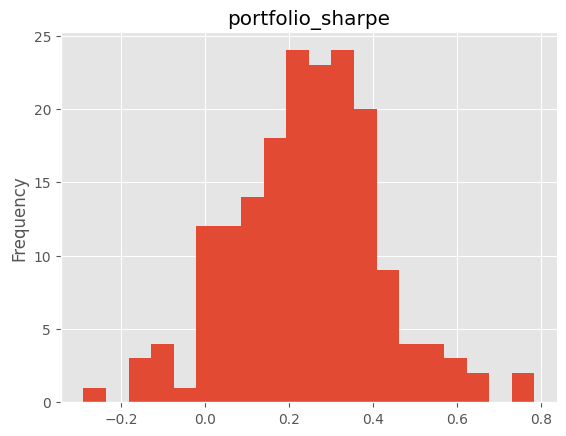

In [25]:
generation_00.sort_values(by='portfolio_sharpe', ascending=False)['portfolio_sharpe'].plot(kind='hist', bins=20, title='portfolio_sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
generation_00['portfolio_sharpe'].mean()

0.24280859004023497

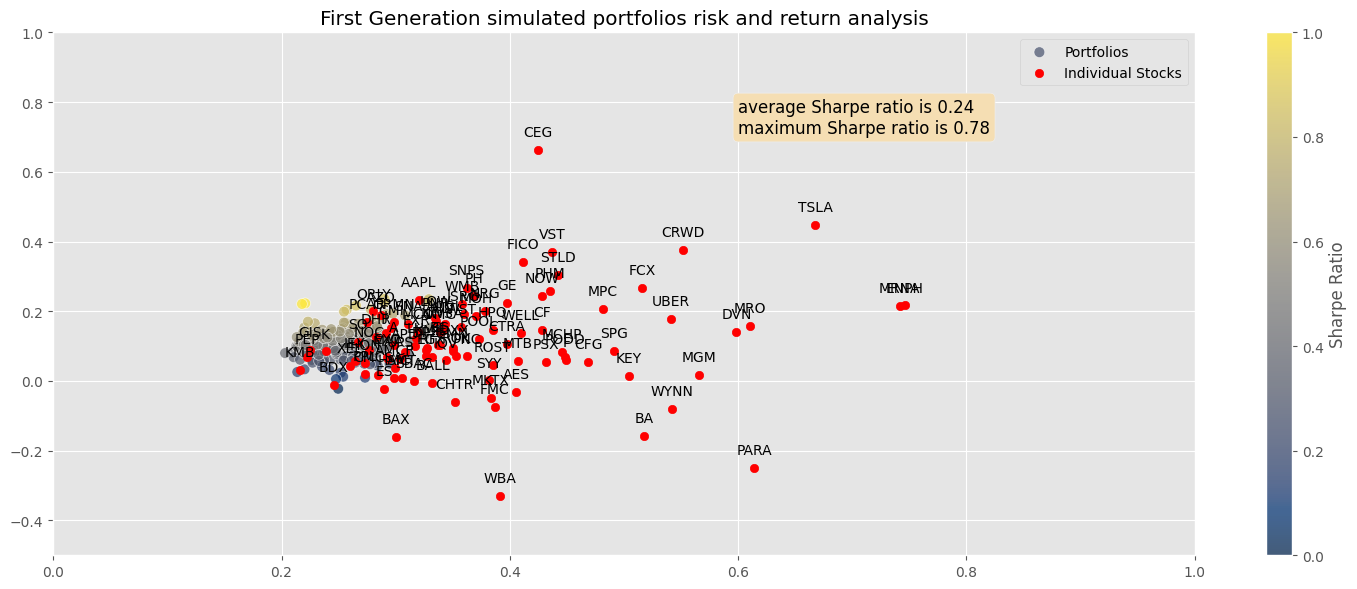

In [27]:
plot_generation_portfolios(generation_00, metrics, generation_name= 'First Generation')


In [28]:


def select_fairies_and_generate_wanderers(portfolio_df, metrics, cov_matrix, num_stocks_per_portfolio, num_fairies=7, num_wanderers=3):
    # Step 1: Select the top 'num_fairies' portfolios based on Sharpe ratio
    sorted_portfolios = portfolio_df.sort_values(by='portfolio_sharpe', ascending=False)
    fairies = sorted_portfolios.head(num_fairies)[['elements', 'weights']]

    # Step 2: Flatten the 'elements' in fairies and get unique values
    fairy_elements = list(set(fairies['elements'].explode().tolist()))

    # Step 3: Exclude the fairy elements from the metrics DataFrame
    remaining_metrics = metrics.drop(index=fairy_elements, errors='ignore')

    # Step 4: Check if we have enough stocks to choose from. If not, we use the entire list from metrics.
    if len(remaining_metrics) < num_stocks_per_portfolio:
        # print("Not enough remaining stocks; resetting to full metrics for wanderer selection.")
        remaining_metrics = metrics.copy()  # Use the entire metrics DataFrame if there aren’t enough stocks left

    # Step 5: Generate wanderers from the updated remaining metrics
    wanderers = initial_generation(remaining_metrics, num_stocks_per_portfolio, num_wanderers)

    # Combine the fairies and wanderers into one DataFrame
    fairy_tale_family = pd.concat([fairies, wanderers], ignore_index=True)

    return fairy_tale_family

In [29]:
fairy_tale_family = select_fairies_and_generate_wanderers(generation_00, metrics, cov_matrix, num_stocks_per_portfolio)
fairy_tale_family

,elements,weights
0,"[K, MAA, EXC, DHR, FICO, BALL, CEG, NOW, CF, A...","[0.10030882017334032, 0.03933614370503699, 0.0..."
1,"[MAA, DPZ, KEY, HLT, CEG, WST, BA, ES, MRNA, A...","[0.03962294041787353, 0.13494499325882886, 0.0..."
2,"[HSIC, VST, MOH, UPS, HPQ, MPC, GIS, F, FCX, T...","[0.001082449057758482, 0.23841227736899656, 0...."
3,"[MOH, CEG, AZO, FMC, AMT, KEY, ISRG, FICO, CFG...","[0.040164644513883636, 0.1118110806338882, 0.0..."
4,"[BA, GE, WST, A, POOL, STLD, ISRG, CMI, RTX, E...","[0.024553804298977064, 0.09920511679741442, 0...."
5,"[MPC, CHTR, CEG, EXC, ROST, PSX, PHM, FICO, OR...","[0.1231650363069978, 0.007677832349028336, 0.0..."
6,"[NRG, LH, EXC, RTX, MCO, FICO, PNR, ENPH, BG, ...","[0.10898090447309527, 0.06354304969957542, 0.0..."
7,"[MCHP, NWSA, EXR, WMB, DVN, MRO, CRWD, KMB, SN...","[0.016203232715304727, 0.007379097603720625, 0..."
8,"[ROK, WBA, IQV, MCHP, CMCSA, PEP, MTB, XEL, LO...","[0.0188568196118612, 0.03583001796032976, 0.01..."
9,"[SO, LOW, EXR, IQV, MCHP, ROK, CRWD, PPL, HON,...","[0.03674719812758351, 0.008329568102667578, 0...."


In [30]:
def create_daddy_mummy_pairs(fairy_tale_family):
    # Get the list of portfolio elements and weights
    portfolio_elements = fairy_tale_family['elements'].tolist()
    portfolio_weights = fairy_tale_family['weights'].tolist()

    # Create all unique pairs using itertools.combinations
    pairs = list(combinations(range(len(portfolio_elements)), 2))  # Indices for pairing

    # Create a list to store pairs with weights as tuples
    pairs_data = []

    for pair in pairs:
        daddy_idx, mummy_idx = pair
        # Get the elements and weights for daddies and mummies
        daddy_tickers = portfolio_elements[daddy_idx]
        mummy_tickers = portfolio_elements[mummy_idx]
        daddy_weights = portfolio_weights[daddy_idx]
        mummy_weights = portfolio_weights[mummy_idx]

        # Combine tickers and weights into tuples for daddy and mummy
        daddy = list(zip(daddy_tickers, daddy_weights))  # List of (ticker, weight) tuples for daddy
        mummy = list(zip(mummy_tickers, mummy_weights))  # List of (ticker, weight) tuples for mummy

        # Store the pair in the list
        pairs_data.append({
            'daddy': daddy,
            'mummy': mummy
        })

    # Convert the pairs data into a DataFrame
    pairs_df = pd.DataFrame(pairs_data)

    return pairs_df

In [31]:

daddy_mummy_pairs_df = create_daddy_mummy_pairs(fairy_tale_family)
daddy_mummy_pairs_df

,daddy,mummy
0,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(MAA, 0.03962294041787353), (DPZ, 0.134944993..."
1,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(HSIC, 0.001082449057758482), (VST, 0.2384122..."
2,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(MOH, 0.040164644513883636), (CEG, 0.11181108..."
3,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(BA, 0.024553804298977064), (GE, 0.0992051167..."
4,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(MPC, 0.1231650363069978), (CHTR, 0.007677832..."
5,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(NRG, 0.10898090447309527), (LH, 0.0635430496..."
6,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(MCHP, 0.016203232715304727), (NWSA, 0.007379..."
7,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(ROK, 0.0188568196118612), (WBA, 0.0358300179..."
8,"[(K, 0.10030882017334032), (MAA, 0.03933614370...","[(SO, 0.03674719812758351), (LOW, 0.0083295681..."
9,"[(MAA, 0.03962294041787353), (DPZ, 0.134944993...","[(HSIC, 0.001082449057758482), (VST, 0.2384122..."


In [32]:
# Function to normalize the weights
def normalize_weights(ticker_weight_list):
    total_weight = sum([weight for _, weight in ticker_weight_list])
    return [(ticker, weight / total_weight) for ticker, weight in ticker_weight_list]


In [33]:
def split_integer(number, ratio=0.2):
    """
    Splits an integer into two parts based on a given ratio.

    Parameters:
    - number (int): The integer to split.
    - ratio (float): The ratio for the first part (between 0 and 1).

    Returns:
    - tuple: Two integers that add up to the original number.
    """
    part1 = math.ceil(number * ratio)
    part2 = number - part1
    return part1, part2

In [34]:
# Function to create children by selecting different proportions of tickers from daddies and mummies
def create_children_from_parents(pairs_df, metrics, num_stocks_per_portfolio):
    children_data = []

    for i, row in pairs_df.iterrows():
        daddy = row['daddy']
        mummy = row['mummy']

        a_split = split_integer(num_stocks_per_portfolio, ratio = 0.2)
        b_split = split_integer(num_stocks_per_portfolio, ratio = 0.5)

        # Case 1: 2 from daddy, 8 from mummy
        daddy_selected_2 = random.sample(daddy, a_split[0])  # Select 2 tickers from daddy
        mummy_selected_8 = random.sample(mummy, a_split[1])  # Select 8 tickers from mummy
        combined_2_8 = daddy_selected_2 + mummy_selected_8  # No need to handle duplicates
        normalized_2_8 = normalize_weights(combined_2_8)
        elements_2_8 = [ticker for ticker, _ in normalized_2_8]  # Extract tickers
        weights_2_8 = [weight for _, weight in normalized_2_8]  # Extract weights

        # Case 2: 5 from daddy, 5 from mummy
        daddy_selected_5 = random.sample(daddy, b_split[0])  # Select 5 tickers from daddy
        mummy_selected_5 = random.sample(mummy, b_split[1])  # Select 5 tickers from mummy
        combined_5_5 = daddy_selected_5 + mummy_selected_5
        normalized_5_5 = normalize_weights(combined_5_5)
        elements_5_5 = [ticker for ticker, _ in normalized_5_5]
        weights_5_5 = [weight for _, weight in normalized_5_5]

        # Case 3: 8 from daddy, 2 from mummy
        daddy_selected_8 = random.sample(daddy, a_split[1])  # Select 8 tickers from daddy
        mummy_selected_2 = random.sample(mummy, a_split[0])  # Select 2 tickers from mummy
        combined_8_2 = daddy_selected_8 + mummy_selected_2
        normalized_8_2 = normalize_weights(combined_8_2)
        elements_8_2 = [ticker for ticker, _ in normalized_8_2]
        weights_8_2 = [weight for _, weight in normalized_8_2]

        # Case 4: Mutated child (replace one ticker with a new one from metrics)
        combined_tickers = daddy_selected_5 + mummy_selected_5  # 5-5 combination
        available_tickers = list(set(metrics.index.tolist()) - set([ticker for ticker, _ in combined_tickers]))
        new_ticker = random.choice(available_tickers)
        # Replace one ticker (randomly chosen from the combined set)
        combined_tickers[random.randint(0, num_stocks_per_portfolio-1)] = (new_ticker, random.uniform(0.01, 0.1))  # Replace one with new ticker
        normalized_mutated = normalize_weights(combined_tickers)
        elements_mutated = [ticker for ticker, _ in normalized_mutated]
        weights_mutated = [weight for _, weight in normalized_mutated]

        # Store each child in the list with elements and weights
        children_data.append({
            'elements': elements_2_8,
            'weights': weights_2_8
        })
        children_data.append({
            'elements': elements_5_5,
            'weights': weights_5_5
        })
        children_data.append({
            'elements': elements_8_2,
            'weights': weights_8_2
        })
        children_data.append({
            'elements': elements_mutated,
            'weights': weights_mutated
        })

    # Convert children data to a DataFrame with elements and weights
    children_df = pd.DataFrame(children_data)

    return children_df



In [35]:
generation_next = create_children_from_parents(daddy_mummy_pairs_df, metrics, 15)
generation_next

,elements,weights
0,"[BALL, K, CEG, ES, KEY, HLT, SNA, MPC, BA, MAA...","[0.023119808366887675, 0.08036834664876712, 0...."
1,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08632338441688148, 0.05644586435742958, 0.1..."
2,"[WST, CF, HLT, CEG, PODD, NOW, A, EXC, DHR, MA...","[0.005725344967124276, 0.12156369816700549, 0...."
3,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08638240326203428, 0.0564844560988277, 0.16..."
4,"[WST, DHR, HLT, VST, MOH, CF, MPC, HPQ, SNA, G...","[0.005668041618068914, 0.10566761858136516, 0...."
...,...,...
175,"[EXR, KMB, EG, WELL, SNPS, NWSA, DVN, MCHP, MP...","[0.010277469628443083, 0.018457147584787642, 0..."
176,"[MTB, MCHP, CMCSA, CRWD, MCHP, PPL, MGM, IQV, ...","[0.09711818084604909, 0.016060817302055955, 0...."
177,"[ROK, ACGL, IQV, XEL, EXR, MRO, J, WBA, MKTX, ...","[0.01796531282874292, 0.009304838805691166, 0...."
178,"[EXR, PPL, IQV, ACGL, MRO, J, WBA, PEP, MCHP, ...","[0.1284346526472084, 0.11621640523864286, 0.01..."


In [36]:
portfolios_with_metrics_df = add_metrics(generation_next,metrics,cov_matrix)
portfolios_with_metrics_df

,elements,weights,mean_returns,volatility,cov_matrix
0,"[BALL, K, CEG, ES, KEY, HLT, SNA, MPC, BA, MAA...","[0.023119808366887675, 0.08036834664876712, 0....","[-0.005759720479298834, 0.0847371540572404, 0....","[0.33225823079959593, 0.23860089747286872, 0.4...",BALL K CEG ES ...
1,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08632338441688148, 0.05644586435742958, 0.1...","[0.14000734923157265, 0.15806608415675333, 0.6...","[0.3198390840210067, 0.3420969831350915, 0.424...",MCO HLT CEG FICO ...
2,"[WST, CF, HLT, CEG, PODD, NOW, A, EXC, DHR, MA...","[0.005725344967124276, 0.12156369816700549, 0....","[0.15463232359479656, 0.14737442307360332, 0.1...","[0.3570098518590913, 0.4283659475141995, 0.342...",WST CF HLT CEG ...
3,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08638240326203428, 0.0564844560988277, 0.16...","[0.14000734923157265, 0.15806608415675333, 0.6...","[0.3198390840210067, 0.3420969831350915, 0.424...",MCO HLT CEG FICO ...
4,"[WST, DHR, HLT, VST, MOH, CF, MPC, HPQ, SNA, G...","[0.005668041618068914, 0.10566761858136516, 0....","[0.15463232359479656, 0.12577973018033356, 0.1...","[0.3570098518590913, 0.2824009238302188, 0.342...",WST DHR HLT VST ...
...,...,...,...,...,...
175,"[EXR, KMB, EG, WELL, SNPS, NWSA, DVN, MCHP, MP...","[0.010277469628443083, 0.018457147584787642, 0...","[0.12461965726920976, 0.031972478947716376, 0....","[0.3181858955728833, 0.21598125285488348, 0.32...",EXR KMB EG WELL ...
176,"[MTB, MCHP, CMCSA, CRWD, MCHP, PPL, MGM, IQV, ...","[0.09711818084604909, 0.016060817302055955, 0....","[0.057297152316031365, 0.08411733377092324, 0....","[0.40681839178046986, 0.445639287059504, 0.284...",MTB MCHP CMCSA CRWD ...
177,"[ROK, ACGL, IQV, XEL, EXR, MRO, J, WBA, MKTX, ...","[0.01796531282874292, 0.009304838805691166, 0....","[0.072859451025833, 0.16443093011753815, 0.060...","[0.352800467554294, 0.3432751592140939, 0.3443...",ROK ACGL IQV XEL ...
178,"[EXR, PPL, IQV, ACGL, MRO, J, WBA, PEP, MCHP, ...","[0.1284346526472084, 0.11621640523864286, 0.01...","[0.12461965726920976, 0.019358057636504514, 0....","[0.3181858955728833, 0.2732261412454593, 0.344...",EXR PPL IQV ACGL ...


In [37]:
generation_01 = add_portfolio_metrics(portfolios_with_metrics_df,generation_id=1)
generation_01

,elements,weights,mean_returns,volatility,cov_matrix,generation_id,portfolio_return,portfolio_variance,portfolio_volatility,portfolio_sharpe
0,"[BALL, K, CEG, ES, KEY, HLT, SNA, MPC, BA, MAA...","[0.023119808366887675, 0.08036834664876712, 0....","[-0.005759720479298834, 0.0847371540572404, 0....","[0.33225823079959593, 0.23860089747286872, 0.4...",BALL K CEG ES ...,1,0.271409,0.046549,0.215753,1.026215
1,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08632338441688148, 0.05644586435742958, 0.1...","[0.14000734923157265, 0.15806608415675333, 0.6...","[0.3198390840210067, 0.3420969831350915, 0.424...",MCO HLT CEG FICO ...,1,0.237499,0.054240,0.232894,0.805083
2,"[WST, CF, HLT, CEG, PODD, NOW, A, EXC, DHR, MA...","[0.005725344967124276, 0.12156369816700549, 0....","[0.15463232359479656, 0.14737442307360332, 0.1...","[0.3570098518590913, 0.4283659475141995, 0.342...",WST CF HLT CEG ...,1,0.216407,0.055069,0.234669,0.709113
3,"[MCO, HLT, CEG, FICO, DHR, MOH, CF, NOW, CI, M...","[0.08638240326203428, 0.0564844560988277, 0.16...","[0.14000734923157265, 0.15806608415675333, 0.6...","[0.3198390840210067, 0.3420969831350915, 0.424...",MCO HLT CEG FICO ...,1,0.237424,0.054499,0.233450,0.802847
4,"[WST, DHR, HLT, VST, MOH, CF, MPC, HPQ, SNA, G...","[0.005668041618068914, 0.10566761858136516, 0....","[0.15463232359479656, 0.12577973018033356, 0.1...","[0.3570098518590913, 0.2824009238302188, 0.342...",WST DHR HLT VST ...,1,0.213025,0.066029,0.256962,0.634433
...,...,...,...,...,...,...,...,...,...,...
175,"[EXR, KMB, EG, WELL, SNPS, NWSA, DVN, MCHP, MP...","[0.010277469628443083, 0.018457147584787642, 0...","[0.12461965726920976, 0.031972478947716376, 0....","[0.3181858955728833, 0.21598125285488348, 0.32...",EXR KMB EG WELL ...,1,0.110079,0.130159,0.360776,0.166526
176,"[MTB, MCHP, CMCSA, CRWD, MCHP, PPL, MGM, IQV, ...","[0.09711818084604909, 0.016060817302055955, 0....","[0.057297152316031365, 0.08411733377092324, 0....","[0.40681839178046986, 0.445639287059504, 0.284...",MTB MCHP CMCSA CRWD ...,1,0.088434,0.078212,0.279665,0.137428
177,"[ROK, ACGL, IQV, XEL, EXR, MRO, J, WBA, MKTX, ...","[0.01796531282874292, 0.009304838805691166, 0....","[0.072859451025833, 0.16443093011753815, 0.060...","[0.352800467554294, 0.3432751592140939, 0.3443...",ROK ACGL IQV XEL ...,1,0.089012,0.070580,0.265669,0.146844
178,"[EXR, PPL, IQV, ACGL, MRO, J, WBA, PEP, MCHP, ...","[0.1284346526472084, 0.11621640523864286, 0.01...","[0.12461965726920976, 0.019358057636504514, 0....","[0.3181858955728833, 0.2732261412454593, 0.344...",EXR PPL IQV ACGL ...,1,0.074011,0.070578,0.265664,0.090379


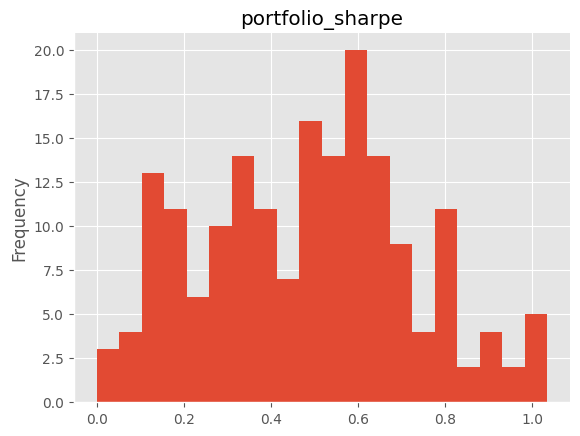

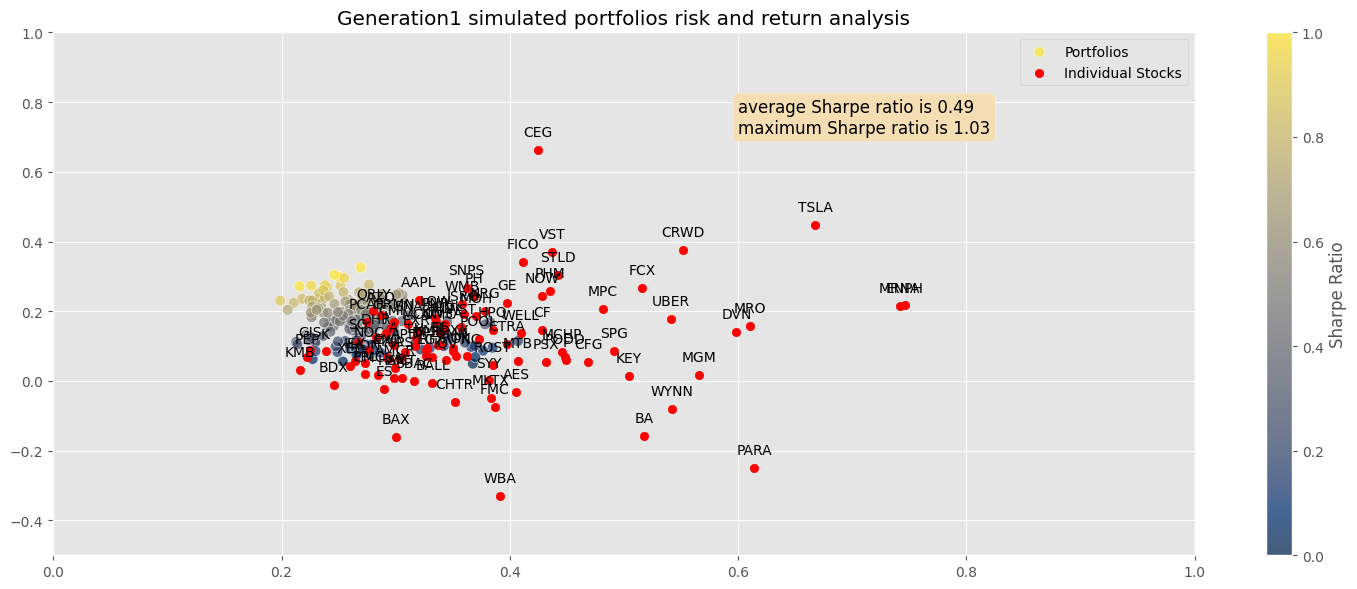

In [38]:
generation_01.sort_values(by='portfolio_sharpe', ascending=False)['portfolio_sharpe'].plot(kind='hist', bins=20, title='portfolio_sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)
plot_generation_portfolios(generation_01, metrics, generation_name= 'Generation1')

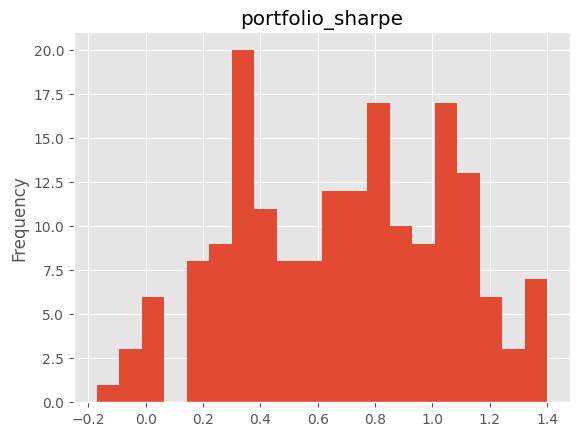

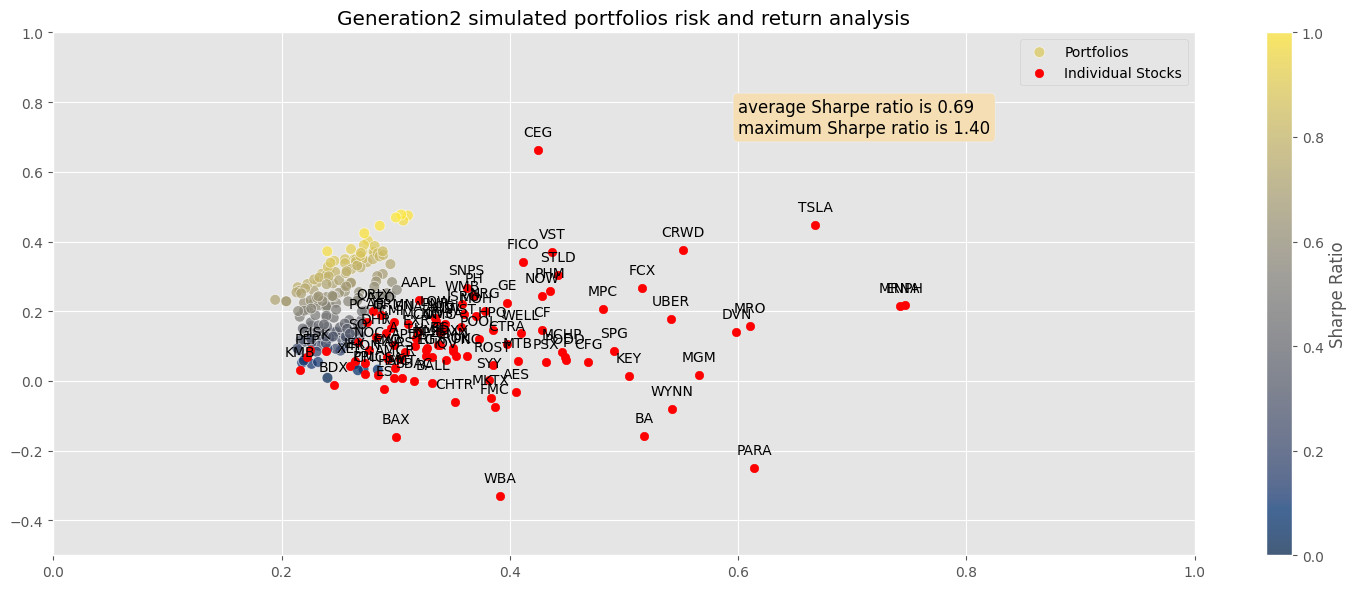

In [39]:
fairy_tale_family = select_fairies_and_generate_wanderers(generation_01, metrics, cov_matrix, num_stocks_per_portfolio)
daddy_mummy_pairs_df = create_daddy_mummy_pairs(fairy_tale_family)
generation_next = create_children_from_parents(daddy_mummy_pairs_df, metrics, 10)
portfolios_with_metrics_df = add_metrics(generation_next,metrics,cov_matrix)
generation_02 = add_portfolio_metrics(portfolios_with_metrics_df,generation_id=2)

generation_02.sort_values(by='portfolio_sharpe', ascending=False)['portfolio_sharpe'].plot(kind='hist', bins=20, title='portfolio_sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)
plot_generation_portfolios(generation_02, metrics, generation_name= 'Generation2')


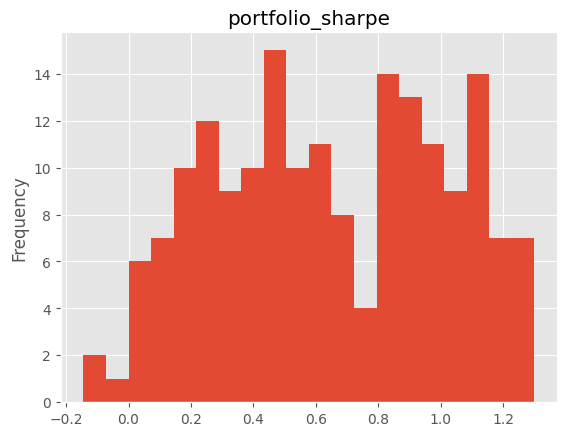

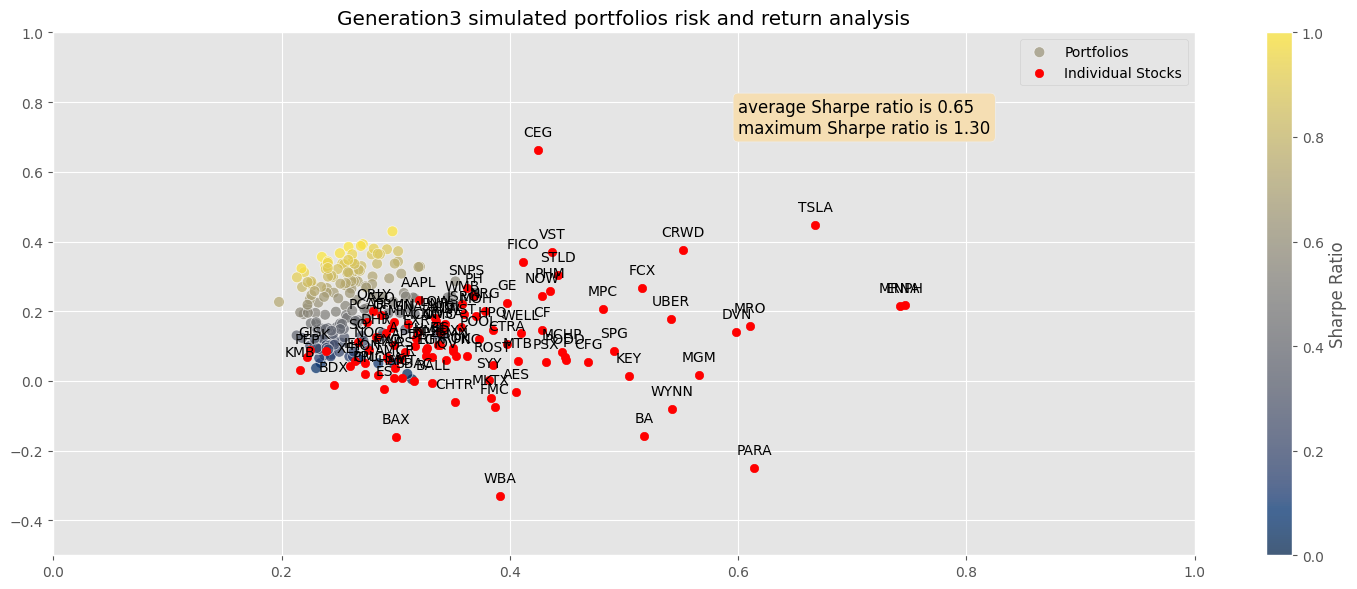

In [40]:
fairy_tale_family = select_fairies_and_generate_wanderers(generation_01, metrics, cov_matrix, num_stocks_per_portfolio)
daddy_mummy_pairs_df = create_daddy_mummy_pairs(fairy_tale_family)
generation_next = create_children_from_parents(daddy_mummy_pairs_df, metrics,10)
portfolios_with_metrics_df = add_metrics(generation_next,metrics,cov_matrix)
generation_03 = add_portfolio_metrics(portfolios_with_metrics_df,generation_id=3)

generation_03.sort_values(by='portfolio_sharpe', ascending=False)['portfolio_sharpe'].plot(kind='hist', bins=20, title='portfolio_sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)
plot_generation_portfolios(generation_03, metrics, generation_name= 'Generation3')

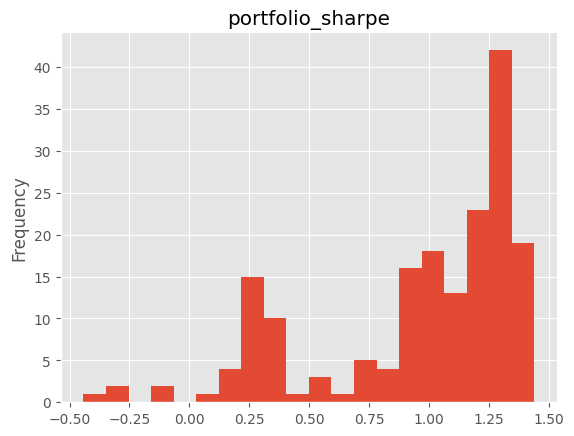

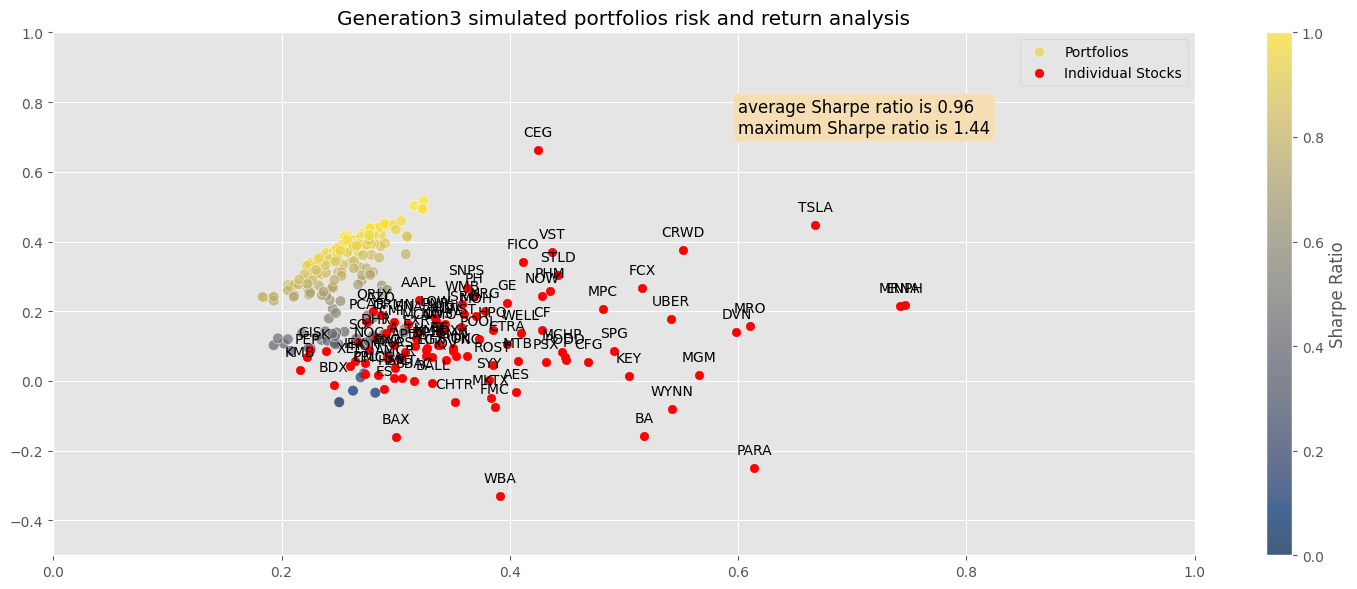

In [41]:
fairy_tale_family = select_fairies_and_generate_wanderers(generation_03, metrics, cov_matrix, num_stocks_per_portfolio)
daddy_mummy_pairs_df = create_daddy_mummy_pairs(fairy_tale_family)
generation_next = create_children_from_parents(daddy_mummy_pairs_df, metrics,10)
portfolios_with_metrics_df = add_metrics(generation_next,metrics,cov_matrix)
generation_04 = add_portfolio_metrics(portfolios_with_metrics_df,generation_id=4)

generation_04.sort_values(by='portfolio_sharpe', ascending=False)['portfolio_sharpe'].plot(kind='hist', bins=20, title='portfolio_sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)
plot_generation_portfolios(generation_04, metrics, generation_name= 'Generation3')

In [42]:
def run_generations(metrics, cov_matrix, num_generations, num_stocks_per_portfolio, fairy_num, wanderer_num, risk_free_rate=0.05):

  num = fairy_num + wanderer_num # fairy and wanderer determines the number of daddy-mummy potentials (they are the best fairies + wanderers)
  num_pairs = (num * (num-1)) / 2 # we determine the number of pairs
  num_portfolios = int(num_pairs * 4) # since each pair will have 4 children, we determine the number of portfolios

  # create the initial generation:
  generation_next = initial_generation(metrics, num_stocks_per_portfolio, num_portfolios)
  fairy_generations = pd.DataFrame()

  # we should start the loop here
  for generation_id in range(num_generations):
    generation_metrics = add_metrics(generation_next, metrics, cov_matrix)
    generation_eval = add_portfolio_metrics(generation_metrics, risk_free_rate, generation_id=generation_id)
    fairy_family = select_fairies_and_generate_wanderers(generation_eval, metrics, cov_matrix, num_stocks_per_portfolio, num_fairies=fairy_num, num_wanderers=wanderer_num)
    daddy_mummy_pairs = create_daddy_mummy_pairs(fairy_family)
    generation_next = create_children_from_parents(daddy_mummy_pairs, metrics, num_stocks_per_portfolio)
    fairy_generations = pd.concat([fairy_generations, generation_eval], ignore_index=True)

  return fairy_generations


In [43]:
fairies = run_generations(
    metrics,
    cov_matrix,
    num_generations=100,
    num_stocks_per_portfolio = 15,
    fairy_num = 7,
    wanderer_num = 3
    )

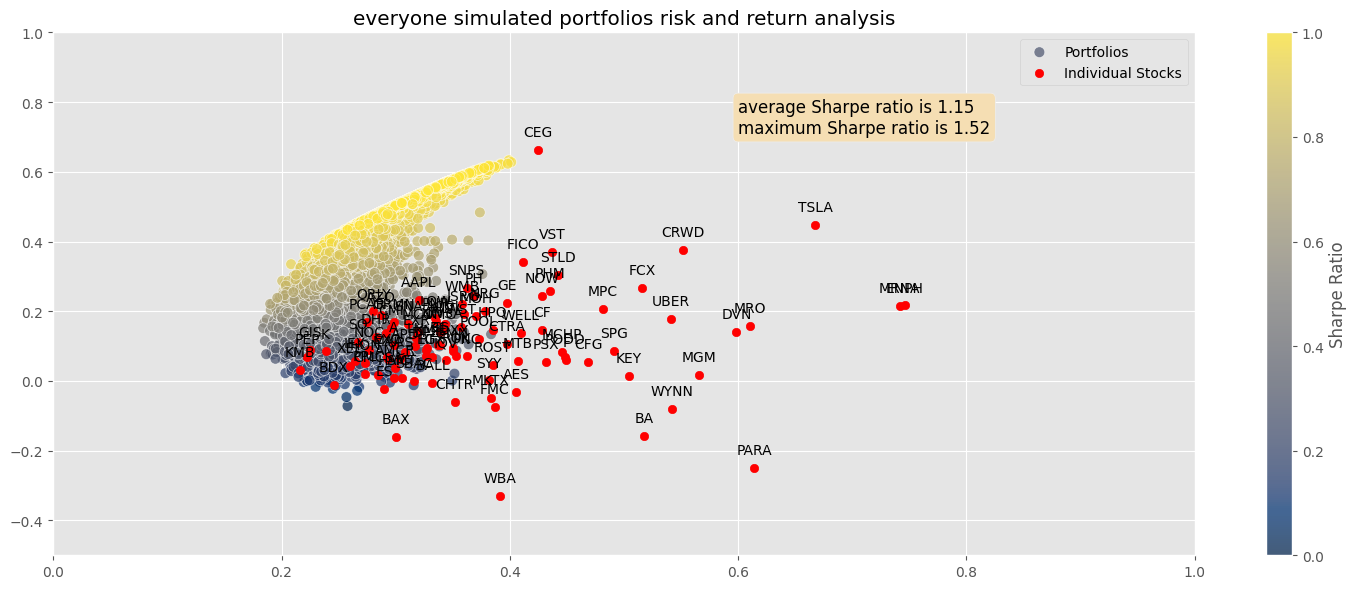

In [44]:
plot_generation_portfolios(fairies, metrics, generation_name= 'everyone')
plt.show()

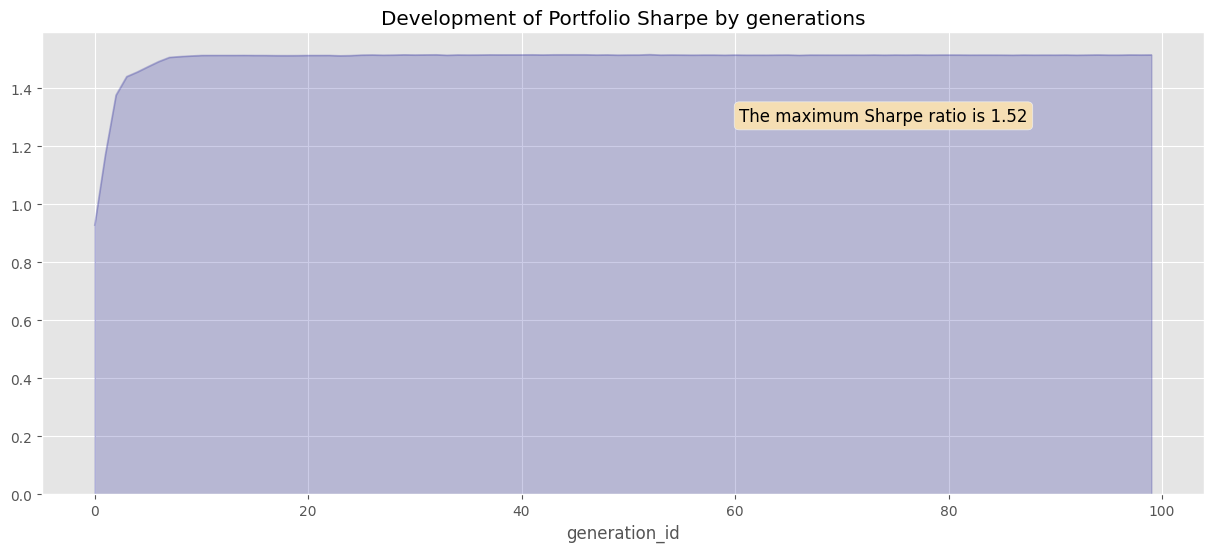

In [45]:
fairy_generations_max = fairies.groupby('generation_id')['portfolio_sharpe'].max()
fairy_generations_mean = fairies.groupby('generation_id')['portfolio_sharpe'].mean()
fairy_generations_min = fairies.groupby('generation_id')['portfolio_sharpe'].min()
max_achieved_sharpe = fairies['portfolio_sharpe'].max()


fig, ax = plt.subplots(figsize=(15, 6))
fairy_generations_max.plot(kind='area', color='darkblue', alpha=0.2, linewidth=1)
#fairy_generations_mean.plot(kind='bar', color='gray', linewidth=1)
#fairy_generations_min.plot(kind='bar', color='red', linewidth=1)
textstr = f"The maximum Sharpe ratio is {max_achieved_sharpe:.2f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax.text(0.6, 0.8, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)

plt.title('Development of Portfolio Sharpe by generations')

plt.show()

In [46]:
max_sharpe_index = fairies['portfolio_sharpe'].idxmax() # Get the index of the maximum Sharpe ratioá
max_sharpe_index

9398

In [47]:
max_sharpe_data = fairies.loc[max_sharpe_index]
max_sharpe_data

,9398
elements,"[GIS, CEG, CEG, CEG, ORLY, CEG, CEG, FICO, ORL..."
weights,"[0.07058493032690735, 0.09937588647435054, 0.0..."
mean_returns,"[0.08934477993318327, 0.6622435066722064, 0.66..."
volatility,"[0.22516111660019797, 0.42451783942748045, 0.4..."
cov_matrix,GIS CEG CEG CEG ...
generation_id,52
portfolio_return,0.501583
portfolio_variance,0.088603
portfolio_volatility,0.297662
portfolio_sharpe,1.517101


In [48]:
max_sharpe_weights = pd.DataFrame(max_sharpe_data['weights'], index=max_sharpe_data['elements'], columns=['weights'])
max_sharpe_weights = max_sharpe_weights.groupby(max_sharpe_weights.index).sum()
max_sharpe_weights

,weights
CEG,0.593194
CRWD,0.029046
FICO,0.091305
GIS,0.070585
ORLY,0.125993
STLD,0.034727
TSLA,0.055150


In [49]:
max_sharpe_portfolio = pd.DataFrame(
    max_sharpe_data[[
        'portfolio_return',
        'portfolio_volatility',
        'portfolio_sharpe'
    ]]
).rename(
    index={
        'portfolio_return': 'returns',
        'portfolio_volatility': 'volatility',
        'portfolio_sharpe': 'sharpe_ratio'
    }
)

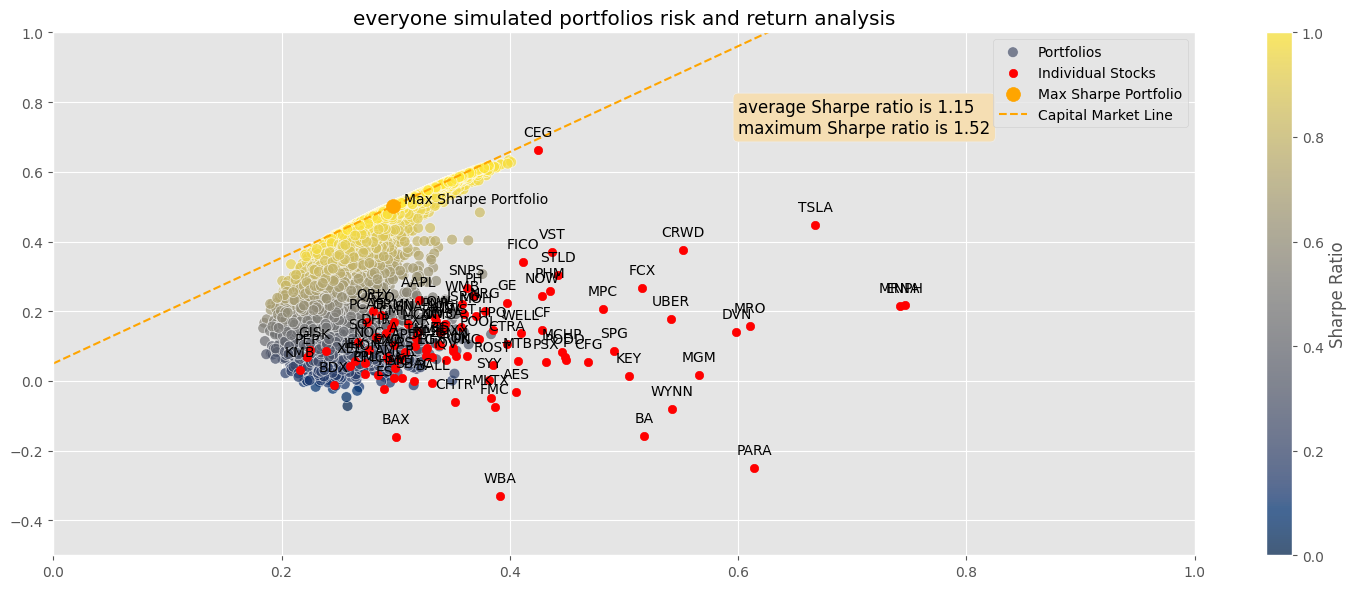

In [50]:
plot_generation_portfolios(fairies, metrics, generation_name= 'everyone')

plt.scatter(
    x=max_sharpe_data.loc['portfolio_volatility'],
    y=max_sharpe_data.loc['portfolio_return'],
    s=100,
    color='orange',
    label='Max Sharpe Portfolio'
)

plt.annotate('Max Sharpe Portfolio',
             xy=(max_sharpe_data.loc['portfolio_volatility'], max_sharpe_data.loc['portfolio_return']),
             xytext=(max_sharpe_data.loc['portfolio_volatility'] + 0.01, max_sharpe_data.loc['portfolio_return'] + 0.01),
             fontsize=10, color='black')

# Calculate the market portfolio's return and volatility
market_return = max_sharpe_data['portfolio_return']  # Extract the scalar value
market_volatility = max_sharpe_data['portfolio_volatility']  # Extract the scalar value
risk_free_rate = 0.05

# Add the Capital Market Line (CML)
cml_x = np.linspace(0, metrics['volatility'].max() * 1.2, 100)  # Adjusted for the full range
sharpe_slope = (market_return - risk_free_rate) / market_volatility  # Slope of the CML
cml_y = risk_free_rate + sharpe_slope * cml_x  # Calculate CML y-values

# Plot the CML using ax.plot() to avoid duplicates
plt.plot(cml_x, cml_y, color='orange', linestyle='--', label='Capital Market Line')

plt.legend()
plt.show()



In [51]:
def calculate_betas(max_sharpe_weights, metrics, cov_matrix):
    """
    Calculate beta values for all stocks in the metrics DataFrame relative to the maximum Sharpe portfolio.

    Parameters:
    - max_sharpe_weights: DataFrame with weights for the stocks in the maximum Sharpe portfolio.
    - metrics: DataFrame containing returns and volatility data for all stocks.
    - cov_matrix: Full covariance matrix of all stocks.

    Returns:
    - A DataFrame with the original metrics and an added column for beta values for each stock.
    """
    # Extract portfolio stocks and weights from max_sharpe_weights
    portfolio_stocks = max_sharpe_weights.index
    portfolio_weights = max_sharpe_weights['weights']

    # Calculate the market portfolio variance using the maximum Sharpe portfolio weights
    filtered_cov_matrix = cov_matrix.loc[portfolio_stocks, portfolio_stocks]
    market_var = portfolio_weights.T @ filtered_cov_matrix.to_numpy() @ portfolio_weights

    # Initialize a Series to store beta values for all stocks
    beta_values = pd.Series(index=metrics.index, dtype=float)

    # Calculate beta for each stock in the entire metrics DataFrame
    for ticker in metrics.index:
        # Covariance of the stock with the market portfolio
        stock_cov_with_market = cov_matrix.loc[ticker, portfolio_stocks].to_numpy() @ portfolio_weights
        beta_values[ticker] = stock_cov_with_market / market_var

    # Add the beta column to the metrics DataFrame
    metrics['Beta'] = beta_values
    return metrics


In [52]:
beta_df = calculate_betas(max_sharpe_weights, metrics, cov_matrix)
beta_df

,mean_returns,variance,volatility,Beta
CI,0.103376,0.113804,0.337348,0.304705
PEP,0.069048,0.049417,0.222298,0.186153
PSX,0.055759,0.186155,0.431457,0.369962
CMCSA,0.017395,0.081127,0.284829,0.225841
CEG,0.662244,0.180215,0.424518,1.347048
...,...,...,...,...
GRMN,0.168827,0.088999,0.298328,0.347315
APD,0.083690,0.094991,0.308206,0.365590
WELL,0.138035,0.167615,0.409408,0.370486
A,0.103037,0.089150,0.298580,0.402245


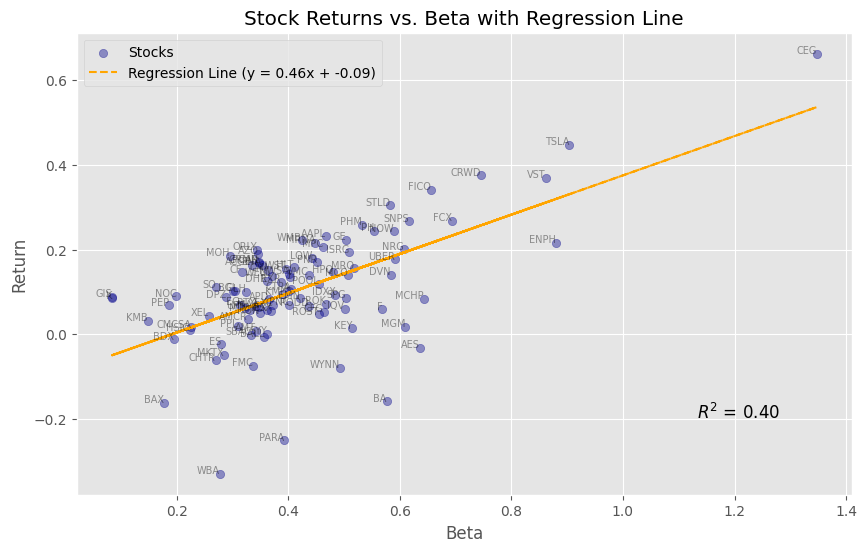

In [53]:
from scipy.stats import linregress

# Extract Beta and Return values for regression
x = beta_df['Beta']
y = beta_df['mean_returns']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept


# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkblue', alpha=0.4, label='Stocks')
plt.plot(x, regression_line, color='orange', linestyle='--', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')


# Add labels for each stock
for ticker in beta_df.index:
    plt.text(beta_df.loc[ticker, 'Beta'], beta_df.loc[ticker, 'mean_returns'], ticker, fontsize=7, alpha=0.4, ha='right')

# Display R-squared value on the plot
plt.text(0.8, 0.2, f'$R^2$ = {r_value**2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set plot labels and title
plt.xlabel('Beta')
plt.ylabel('Return')
plt.title('Stock Returns vs. Beta with Regression Line')
plt.grid(True)
plt.legend()
plt.show()